In [193]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale
import sweetviz as sv
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [194]:
#Read in the csv file and convert to a Pandas dataframe
#estate = pd.read_csv('data/realEstate.csv')
#lands = pd.read_csv('data/RiyadhAqqar/Lands.csv')
#villas = pd.read_csv('data/RiyadhAqqar/villas.csv')
apartments = pd.read_csv('data/RiyadhAqqar/Apartments.csv')
#riyadh = pd.read_csv('data/RiyadhVillasAqar.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [197]:
#display(estate.head(2))
#display(lands.head(2))
#display(villas.head(2))
display(apartments.head(10))
#display(riyadh.head(2))

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,لا,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,لا,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,لا,1050000
3,شقة,الرياض,حي النرجس,شمالية,3,1.0,3,101,1,0,0,أرضي,0.0,نعم,1200000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,نعم,1200000
5,شقة,الرياض,حي الياسمين,NaN,3,1.0,2,118,1,0,1,3,0.0,لا,850000
6,شقة,الرياض,حي النرجس,شرقية,3,1.0,3,112,1,0,0,أرضي,0.0,لا,885000
7,شقة,الرياض,حي النرجس,شرقية,2,1.0,3,100,1,0,1,3,0.0,لا,1200000
8,شقة,الرياض,حي النرجس,جنوبية شرقية,3,1.0,3,170,1,0,1,ثالث,NaN,نعم,930000
9,شقة,الرياض,حي العقيق,NaN,3,1.0,3,115,0,1,1,NaN,11.0,لا,1100000


In [198]:
apartments['مؤثثة'] = apartments['مؤثثة'].replace({1: 'نعم', 0: 'لا'})

In [199]:
apartments['الحي'] = apartments['الحي'].str.replace('الرياض', 'وسط الرياض')

In [180]:
#dtale.show(apartments)

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [151]:
# source : MYFAISAL from Aqaar app 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [152]:
# the data is up-to-date : last updated 7 months ago 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [153]:
# -

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [200]:
apartments.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات       float64
عدد الحمامات       object
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور              object
عمر العقار        float64
مؤثثة              object
السعر الاجمالي      int64
dtype: object

In [201]:
apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [202]:
apartments.duplicated().sum()

139

In [203]:
duplicated_values = apartments[apartments.duplicated()]
duplicated_values

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
34,شقة,الرياض,حي النرجس,NaN,2,2.0,3,157,1,0,0,أرضي,0.0,لا,950000
61,شقة,الرياض,حي النرجس,جنوبية,4,1.0,3,120,1,0,0,أرضي,0.0,لا,850000
82,شقة,منطقة الرياض,وسط الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,لا,715000
91,شقة,الرياض,حي النرجس,جنوبية,2,2.0,3,117,0,0,1,3,0.0,لا,899000
92,شقة,الرياض,حي العقيق,شمالية,4,1.0,3,220,1,1,1,3,0.0,لا,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,شقة,الرياض,حي العارض,جنوبية,3,2.0,3,147,1,1,1,NaN,0.0,لا,959000
525,شقة,الرياض,حي النرجس,شرقية,3,1.0,4,178,1,0,1,أرضي,0.0,لا,900000
527,شقة,منطقة الرياض,وسط الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,لا,715000
528,شقة,الرياض,حي الربيع,جنوبية,3,1.0,3,114,1,0,1,أرضي,0.0,لا,1000000


In [204]:
apartments.drop_duplicates(inplace=True)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [205]:
apartments.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة           123
عدد الغرف           0
عدد الصالات         8
عدد الحمامات        0
المساحة             0
مطبخ                0
مدخل سيارة          0
مصعد                0
الدور              53
عمر العقار          1
مؤثثة               0
السعر الاجمالي      0
dtype: int64

In [206]:
apartments['عدد الصالات'] = apartments['عدد الصالات'].fillna(0)

In [210]:
apartments['عمر العقار'] = apartments['عمر العقار'].fillna('غير معروف')

In [211]:
apartments['الواجهة'] = apartments['الواجهة'].fillna('بدون')

In [218]:
apartments['الدور'] = apartments['الدور'].fillna('غير محدد')

In [219]:
apartments['مدخل سيارة'] = apartments['مدخل سيارة'].replace({1: 'يوجد', 0: ' لا يوجد'})

In [220]:
apartments['مطبخ'] = apartments['مطبخ'].replace({1: 'يوجد', 0: ' لا يوجد'})

In [225]:
apartments['مصعد'] = apartments['مصعد'].replace({1: 'يوجد', 0: ' لا يوجد'})

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [221]:
apartments['عدد الصالات'] = apartments['عدد الصالات'].astype(int)

In [223]:
apartments['عمر العقار'] = apartments['عمر العقار'].astype(int)

In [226]:
dtale.show(apartments, open_browser=True)

2024-05-17 00:28:24,673 - ERROR    - Exception occurred while processing request: object of type 'NoneType' has no len()
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 1573, in get_processes
    [_load_process(data_id) for data_id in global_state.keys()],
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 1573, in <listcomp>
    [_load_process(data_id) for data_id in global_state.keys()],
     ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 1558, in _load_process
    rows=len(data),
         ^^^^^^^^^
TypeError: object of type 'NoneType' has no len()


<AxesSubplot: >

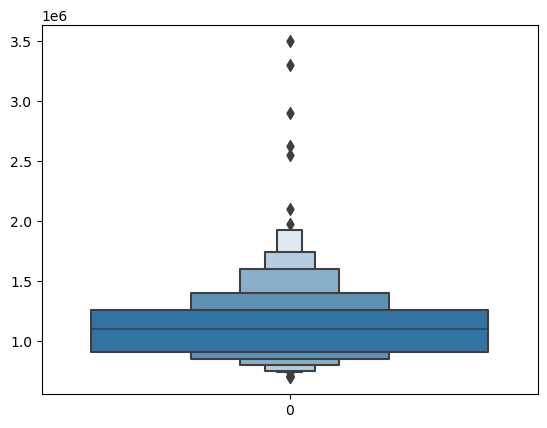

In [228]:
sns.boxenplot(apartments['السعر الاجمالي'])

In [164]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [165]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [166]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [167]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [168]:
# go back to 7th dimension Accuracy 

2024-05-17 00:00:58,603 - ERROR    - Exception occurred while processing request: object of type 'NoneType' has no len()
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 1573, in get_processes
    [_load_process(data_id) for data_id in global_state.keys()],
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 1573, in <listcomp>
    [_load_process(data_id) for data_id in global_state.keys()],
     ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py", line 1558, in _load_process
    rows=len(data),
         ^^^^^^^^^
TypeError: object of type 'NoneType' has no len()


### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.